In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
df = pd.read_csv('laptop_dataset.csv')
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [3]:
row,col = df.shape
print(row)
print(col)

1273
13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [5]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [6]:
df.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [7]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [8]:
(set(df['Company']))


{'Acer',
 'Apple',
 'Asus',
 'Chuwi',
 'Dell',
 'Fujitsu',
 'Google',
 'HP',
 'Huawei',
 'LG',
 'Lenovo',
 'MSI',
 'Mediacom',
 'Microsoft',
 'Razer',
 'Samsung',
 'Toshiba',
 'Vero',
 'Xiaomi'}

In [9]:
df


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [10]:
data = df[['TypeName','Ram','Weight','Price','TouchScreen','Ips','Ppi','Gpu_brand','Os']]
data


,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Gpu_brand,Os
0,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel,Mac
1,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel,Mac
2,Notebook,8,1.86,10.329931,0,0,141.211998,Intel,Others
3,Ultrabook,16,1.83,11.814476,0,1,220.534624,AMD,Mac
4,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel,Mac
...,...,...,...,...,...,...,...,...,...
1268,Notebook,4,2.20,10.555257,0,0,100.454670,Nvidia,Windows
1269,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel,Windows
1270,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel,Windows
1271,Notebook,2,1.50,9.409283,0,0,111.935204,Intel,Windows


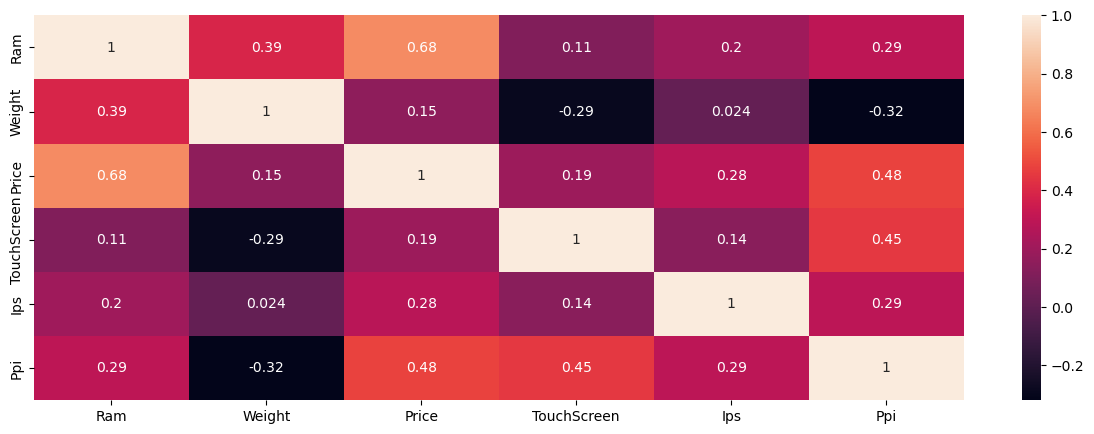

In [11]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
TypeName = pd.get_dummies(data['TypeName'], drop_first = True)
# Cpu_brand = pd.get_dummies(data['Cpu_brand'], drop_first = True)
Gpu_brand = pd.get_dummies(data['Gpu_brand'], drop_first = True)
Os = pd.get_dummies(data['Os'], drop_first = False)



In [13]:
print(TypeName)
# print(Cpu_brand)
print(Gpu_brand)
print(Os)

      Gaming  Netbook  Notebook  Ultrabook  Workstation
0          0        0         0          1            0
1          0        0         0          1            0
2          0        0         1          0            0
3          0        0         0          1            0
4          0        0         0          1            0
...      ...      ...       ...        ...          ...
1268       0        0         1          0            0
1269       0        0         0          0            0
1270       0        0         0          0            0
1271       0        0         1          0            0
1272       0        0         1          0            0

[1273 rows x 5 columns]
      Intel  Nvidia
0         1       0
1         1       0
2         1       0
3         0       0
4         1       0
...     ...     ...
1268      0       1
1269      1       0
1270      1       0
1271      1       0
1272      0       0

[1273 rows x 2 columns]
      Mac  Others  Windows
0       1  

In [14]:
data = pd.concat([data, TypeName], axis = 1)
# data = pd.concat([data, Cpu_brand], axis = 1)
data = pd.concat([data, Gpu_brand], axis = 1)
data = pd.concat([data, Os], axis = 1)



In [15]:
data


,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Gpu_brand,Os,Gaming,Netbook,Notebook,Ultrabook,Workstation,Intel,Nvidia,Mac,Others,Windows
0,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel,Mac,0,0,0,1,0,1,0,1,0,0
1,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel,Mac,0,0,0,1,0,1,0,1,0,0
2,Notebook,8,1.86,10.329931,0,0,141.211998,Intel,Others,0,0,1,0,0,1,0,0,1,0
3,Ultrabook,16,1.83,11.814476,0,1,220.534624,AMD,Mac,0,0,0,1,0,0,0,1,0,0
4,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel,Mac,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Notebook,4,2.20,10.555257,0,0,100.454670,Nvidia,Windows,0,0,1,0,0,0,1,0,0,1
1269,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel,Windows,0,0,0,0,0,1,0,0,0,1
1270,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel,Windows,0,0,0,0,0,1,0,0,0,1
1271,Notebook,2,1.50,9.409283,0,0,111.935204,Intel,Windows,0,0,1,0,0,1,0,0,0,1


In [16]:
data = data.drop(['TypeName','Gpu_brand','Os'],axis =1)

In [17]:
data

,Ram,Weight,Price,TouchScreen,Ips,Ppi,Gaming,Netbook,Notebook,Ultrabook,Workstation,Intel,Nvidia,Mac,Others,Windows
0,8,1.37,11.175755,0,1,226.983005,0,0,0,1,0,1,0,1,0,0
1,8,1.34,10.776777,0,0,127.677940,0,0,0,1,0,1,0,1,0,0
2,8,1.86,10.329931,0,0,141.211998,0,0,1,0,0,1,0,0,1,0
3,16,1.83,11.814476,0,1,220.534624,0,0,0,1,0,0,0,1,0,0
4,8,1.37,11.473101,0,1,226.983005,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,4,2.20,10.555257,0,0,100.454670,0,0,1,0,0,0,1,0,0,1
1269,4,1.80,10.433899,1,1,157.350512,0,0,0,0,0,1,0,0,0,1
1270,16,1.30,11.288115,1,1,276.053530,0,0,0,0,0,1,0,0,0,1
1271,2,1.50,9.409283,0,0,111.935204,0,0,1,0,0,1,0,0,0,1


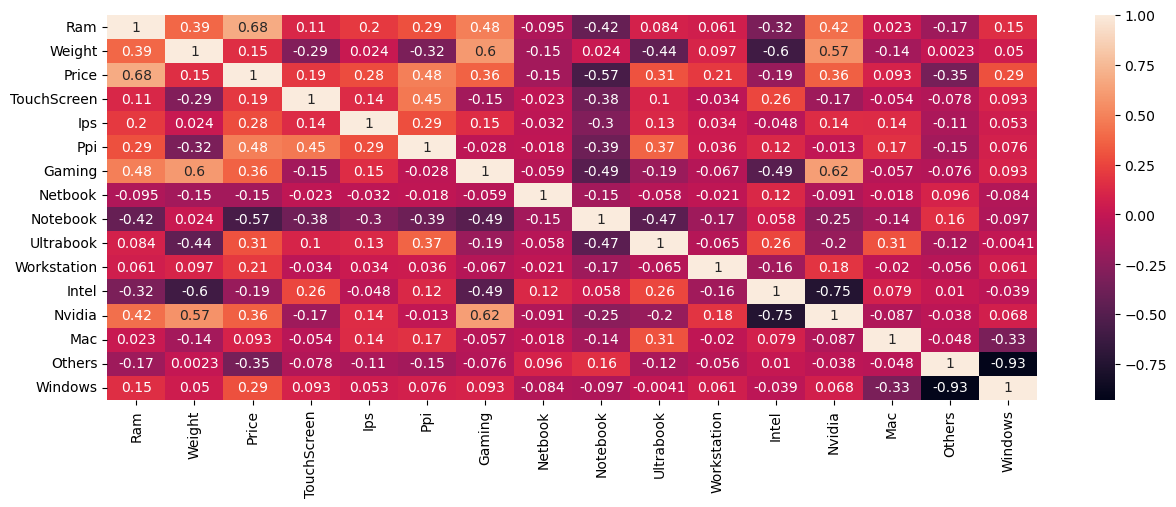

In [18]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [19]:
data = data.drop(['Ips','Ppi'],axis =1)
data = data.drop(['TouchScreen','Others','Netbook','Notebook'],axis =1)


In [20]:
data

,Ram,Weight,Price,Gaming,Ultrabook,Workstation,Intel,Nvidia,Mac,Windows
0,8,1.37,11.175755,0,1,0,1,0,1,0
1,8,1.34,10.776777,0,1,0,1,0,1,0
2,8,1.86,10.329931,0,0,0,1,0,0,0
3,16,1.83,11.814476,0,1,0,0,0,1,0
4,8,1.37,11.473101,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1268,4,2.20,10.555257,0,0,0,0,1,0,1
1269,4,1.80,10.433899,0,0,0,1,0,0,1
1270,16,1.30,11.288115,0,0,0,1,0,0,1
1271,2,1.50,9.409283,0,0,0,1,0,0,1


In [21]:
data.to_csv("clean_laptop_data.csv")

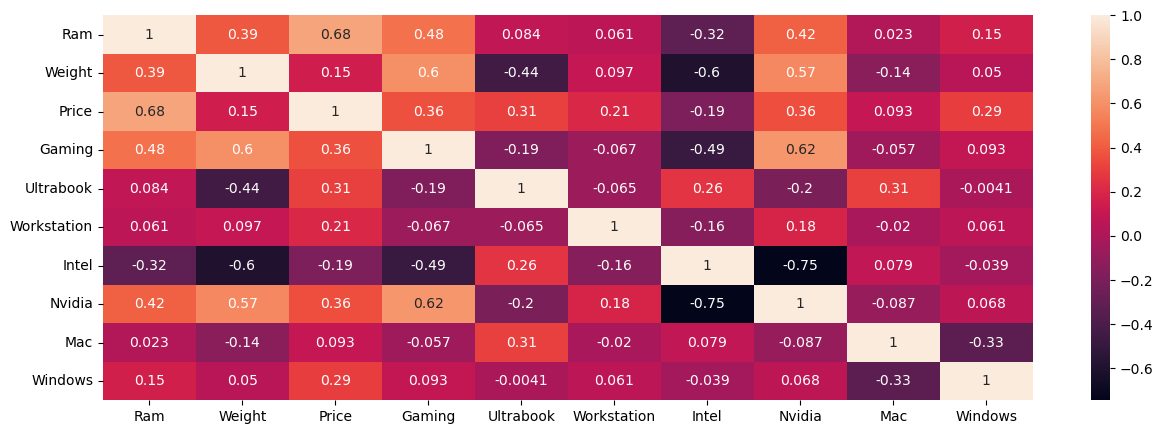

In [22]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.85, test_size = 0.15, random_state = 1)


In [24]:
df_train

,Ram,Weight,Price,Gaming,Ultrabook,Workstation,Intel,Nvidia,Mac,Windows
409,2,1.15,9.694068,0,0,0,1,0,0,1
94,8,1.25,10.931154,0,1,0,1,0,0,1
579,8,2.20,10.594313,0,0,0,0,0,0,0
386,4,1.50,10.283659,0,0,0,1,0,0,1
936,4,2.18,10.300995,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
715,8,1.87,10.729081,0,0,0,0,1,0,1
905,16,1.08,11.624777,0,1,0,1,0,0,1
1096,8,2.36,10.435152,0,0,0,0,0,0,1
235,16,2.36,10.776844,0,0,0,0,0,0,0


In [25]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['Ram','Weight','Gaming','Ultrabook','Workstation','Intel','Nvidia','Mac','Windows']]
y_train = df_train['Price'].astype('int')
# df_test_predict = X_train.iloc[0:1]
# for linear regression
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)


In [26]:
df_test.iloc[10:11]

,Ram,Weight,Price,Gaming,Ultrabook,Workstation,Intel,Nvidia,Mac,Windows
799,8,2.0,10.580859,0,0,0,0,0,0,1


In [28]:
X_test = df_train[['Ram','Weight','Gaming','Ultrabook','Workstation','Intel','Nvidia','Mac','Windows']]
Y_test = df_train['Price'].astype('int')

In [29]:
test_data = df_test.iloc[19:20].astype('int')
actual_price = test_data['Price']
test_data = test_data.drop(['Price'], axis=1)

In [31]:
test_data

,Ram,Weight,Gaming,Ultrabook,Workstation,Intel,Nvidia,Mac,Windows
845,4,2,0,0,0,0,0,0,1


In [30]:
prediction = lr_model.predict(test_data)
print(df_test.iloc[19:20])
print("actual price:", actual_price)
print("predicted price:",prediction[0])

     Ram  Weight      Price  Gaming  Ultrabook  Workstation  Intel  Nvidia  \
845    4    2.18  10.580859       0          0            0      0       0   

     Mac  Windows  
845    0        1  
actual price: 845    10
Name: Price, dtype: int32
predicted price: 9.83483671631717


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Making predictions on the testing set
linear_pred = lr_model.predict(X_test)

# Calculate regression evaluation metrics
mse = mean_squared_error(Y_test, linear_pred)
mae = mean_absolute_error(Y_test, linear_pred)
r2 = r2_score(Y_test, linear_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.23028193157747864
Mean Absolute Error (MAE): 0.3707753718815435
R-squared (R2): 0.5195726992941192
